Ce qui suit a été construit à partir des pages :

https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Concepts de base

Rappels :

Un "graphique" est strucutré de la manière suivante :
- `Figure` est l'objet de plus haut niveau : "coquille externe" du graphique
- `Axes` contient l'objet graphique en lui-même
- `Axis` est un axe du graphique (contrôle des labels, xmin, xmax, etc.)
- `Artist` est chaque élément dessiné sur un graphique (ligne, titre, etc)
- `Canvas` est la zone de tracé du graphe

Les données à tracer doivent être de type `array` de `numpy`. (np.array).

Si les données sont sous formes de séquences, elles sont converties en interne en array.

Le module `pyplot` crée automatiquement (et de façon transparente) les objets `Figure` et `Axes` nécessaires à la construction d'un graphique. Chaque "élément" qu'on rajoute par la suite (ex : plt.plot() ou plt.title()) s'ajoute à la `Figure` et l'`Axes` actif.

Pour visualiser la figure créée, il faut utiliser la commande `plt.show()`

# Création d'un graphique
La commande de base est `plt.plot(x, y, formattage)`

x et y étant l'abscisse et l'ordonnée sous forme de np.array.

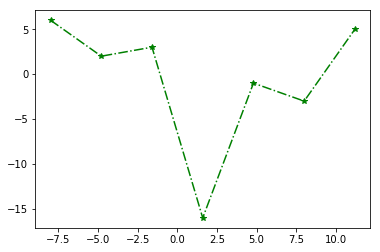

In [2]:
plt.figure(1)
x = np.arange(-8, 13, 3.2) # nombres compris entre -8 et 13 (exclu) par pas de 3.2 (de type array)
y = [6, 2, 3, -16, -1, -3, 5] # liste classique de python, sera convertie "en interne" en array

plt.plot(x, y, 'g-.', marker='*') 
# 'g-.' = ligne verte (green) en pointillés-tirets
# marker='*' pour voir les points comme des étoiles
plt.show() # à ne pas oublier pour voir le graphe

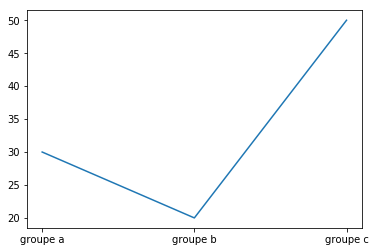

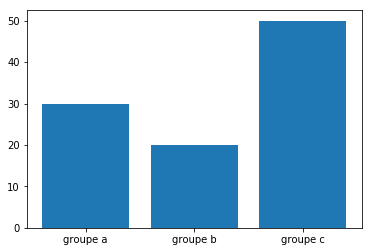

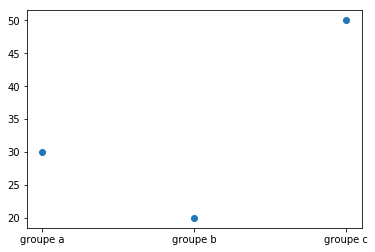

In [3]:
noms = ['groupe a', 'groupe b', 'groupe c']
valeurs = [30, 20, 50]
# l'appel de plt.figure() répété permet de créer une nouvelle figure pour chaque graphique.
plt.figure(2)
ax1 = plt.axes()
plt.plot(noms, valeurs) # plot : graphique "classique"
plt.show()
plt.figure(3)
plt.bar(noms, valeurs) # plot : graphique "en barres"
plt.show()
plt.figure(4)
plt.scatter(noms, valeurs) # scatter : nuage de points
plt.show()

# Plusieurs Axes sur une Figure

Un Axes est placé dans un "grille" de $N_l$ lignes et $N_c$ colonnes, avec un identifiant $id$ (entier de 1 à $N_l \times N_c$), sous le modèle
`subplot(Nl, Nc, id)`

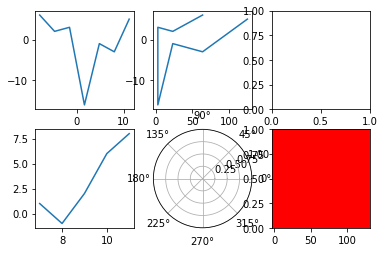

In [4]:
plt.figure(5)          # création de la Figure
plt.subplot(2, 3, 1)   # premier Axes avec une Figure contenant 2 lignes, 3 colonnes
plt.plot(x, y)
ax_id = plt.subplot(2, 3, 2)   # ax_id permet de garder une référence à cet Axes      
plt.plot(x**2, y)
plt.subplot(2, 3, 3)            
plt.subplot(2, 3, 4)
plt.plot([i for i in range(7, 12)], [1, -1, 2,6, 8])
plt.subplot(2, 3, 5, projection='polar')
plt.subplot(2, 3 ,6 , sharex=ax_id, facecolor='red') # partage un axe des abscisses commun avec le graphe ax_id

plt.show()

# Manipulation des Axes (programmation orientée objet)
En gardant une référence vers les objets créés (Figure ou Axes), on peut modifier leurs attributs et "embellir" le graphique.

<IPython.core.display.Javascript object>


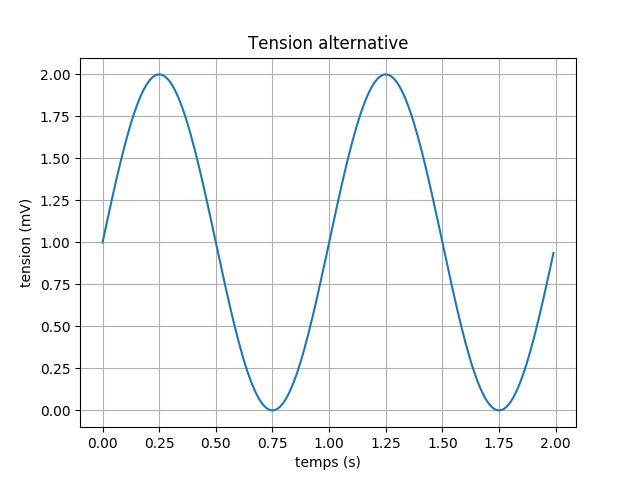

In [6]:
# backend permettant de "manipuler" le graphique
%matplotlib notebook 

# création des données à tracer
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots() # on garde une référence aux objets créés
ax.plot(t, s) # méthode plot de l'objet Axes

ax.set(xlabel='temps (s)', ylabel='tension (mV)', title='Tension alternative')  # méthode set de l'objet Axes
ax.grid() # méthode grid de l'objet Axes

fig.savefig("test.png") # enregistre l'image avec la méthode save de Figure
plt.show()

# Création rapide d'abscisses avec Numpy
Deux commandes importantes `arange` et `linspace`
- np.arange(xmin, xmax, pas)
- np.linspace(xmin, xmax, nb_points)

In [7]:
absc_1 = np.arange(2, 15, 3) # équivalent du range "classique" de python
print(absc_1)

[ 2  5  8 11 14]


In [8]:
absc_2 = np.linspace(2, 15, 5) # crée 5 valeurs, réparties linéairement, entre 2 et 15
print(absc_2)

[ 2.    5.25  8.5  11.75 15.  ]


# Fonctions mathématiques de Numpy utiles
Numpy contient toutes les fonctions usuelles de math et peut appliquer ces fonctions à l'ensemble des données d'un Array numpy.
- Constantes  : `np.pi`, `np.e`
- Fonctions trigo : `np.cos`, `np.sin`, `np.tan`
- Logarithme : `np.log` (log népérien), `np.log10` (log décimal)
- Exponentielle : `np.exp`

In [9]:
Pi = np.pi
e = np.e
print(Pi)
print(e)

3.141592653589793
2.718281828459045


In [10]:
print(np.log10(10**7))    # log10(10^n) = n : logarithme décimal
print(np.log(e**3))       # log(e^n) = n : logarithme népérien
print(np.exp(1j*Pi/2))    # e^(ixPi/2) = i (un complexe s'écrit sous la forme a+bj)

7.0
3.0
(6.123233995736766e-17+1j)


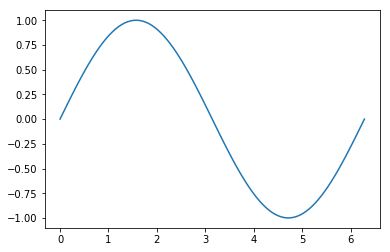

In [11]:
# retour au backend "en ligne"
%matplotlib inline 

theta = np.linspace(0, 2*Pi, 100)
sin = np.sin(theta)

plt.plot(theta, sin)
plt.show()

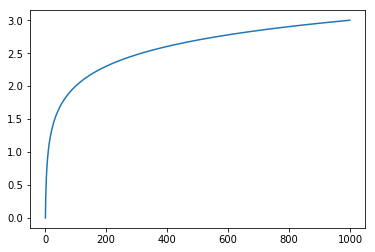

In [12]:
x = np.arange(1, 1000)
y = np.log10(x)

plt.plot(x, y)
plt.show()

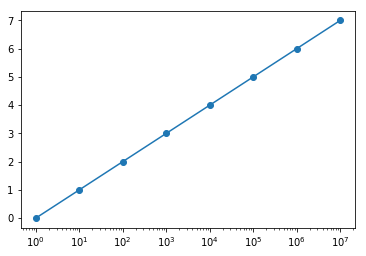

In [13]:
x = [10**n for n in range(8)]
y = np.log10(x)

plt.semilogx() # axe des abscisses en échelle logarithmique
plt.plot(x, y, 'o-')
plt.show()